# Performance Model for Forecasting

Establishing a baseline is essential on any time series forecasting problem. A baseline in performance gives you an idea of how well all other models will actually perform on your problem.

## Forecast Performance Baseline

A baseline in forecast performance provides a point of comparison. It is a point of reference for all other modeling techniques on your problem. If a model achieves performance at or below the baseline, the technique should be fixed or abandoned. The technique used to generate a forecast to calculate the baseline performance must be easy to implement and naive of problem-specific details. Before you can establish a performance baseline on your forecast problem, you must develop a test harness. This is comprised of:

1. The dataset you intend to use to train and evaluate models.
2. The resampling technique you intend to use to estimate the performance of the technique (e.g. train/test split).
3. The performance measure you intend to use to evaluate forecasts (e.g. root mean squared error).

Once prepared, you then need to select a naive technique that you can use to make a forecast and calculate the baseline performance. The goal is to get a baseline performance on your time series forecast problem as quickly as possible so that you can get to work better understanding the dataset and developing more advanced models. Three properties of a good technique for making a baseline forecast are:

- Simple: A method that requires little or no training or intelligence.
- Fast: A method that is fast to implement and computationally trivial to make a prediction.
- Repeatable: A method that is deterministic, meaning that it produces an expected output given the same input.

A common algorithm used in establishing a baseline performance is the persistence algorithm.

## Persistence Algorithm

The most common baseline method for supervised machine learning is the Zero Rule algorithm. This algorithm predicts the majority class in the case of classification, or the average outcome in the case of regression. This could be used for time series, but does not respect the serial correlation structure in time series datasets. The equivalent technique for use with time series dataset is the persistence algorithm.
The persistence algorithm uses the value at the current time step (t) to predict the expected outcome at the next time step (t+1). This satisfies the three above conditions for a baseline forecast. To make this concrete, we will look at how to develop a persistence model and use it to establish a baseline performance for a simple univariate time series problem.

### Persistence Algorithm Steps:
1. Transform the univariate dataset into a supervised learning problem. 
2. Establish the train and test datasets for the test harness.
3. Define the persistence model.
4. Make a forecast and establish a baseline performance.
5. Review the complete example and plot the output.

### Step 1: Define supervised learning problem
Load dataset and create a lagged representation. That is given the observation at t, predict the observation at t+1.

In [3]:
from pandas import DataFrame
from pandas import Series
from pandas import concat

series = Series.from_csv('shampoo.csv', header=0)
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
print(dataframe.head(5))

       t    t+1
0    NaN  266.0
1  266.0  145.9
2  145.9  183.1
3  183.1  119.3
4  119.3  180.3


### Step 2: Train and Test Sets
Separate the dataset into train and test sets. Keep the first 66% of the observations for training and remaining 34% for evaluation. During the split, exclude the first row of data with the NaN value

In [13]:
#split into train/test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:-1]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

### Step 3: Persistence Algorithm
We can define our persistence model as a function that returns the value provided as input. For example, if the t value of 266.0 was provided, then this is returned as the prediction, whereas the actual real or expected value happens to be 145.9 (taken from the first usable row in our lagged dataset).

In [6]:
#Persistence Model
def model_persistence(x):
    return x

### Step 4: Make and Evaluate Forecast

Evaluate this model on the test dataset using the walk-forward validation method. No model training or retraining is required, so in essence, we step through the test dataset time step by time step and get predictions. Once predictions are made for each time step in the training dataset, they are compared to the expected values and a Root Mean Squared Error (RMSE) score is calculated.

In [14]:
#Walk-forward Validation
from numpy import sqrt
from sklearn.metrics import mean_squared_error
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 136.761


### Step 5: Complete Example
Finally, plot the diverging predictions from the expected values from the test dataset. From the plot of the persistence model predictions, it is clear that the model is one-step behind reality. 

Populating the interactive namespace from numpy and matplotlib
Test RMSE: 136.761


/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test', 'datetime', 'sqrt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


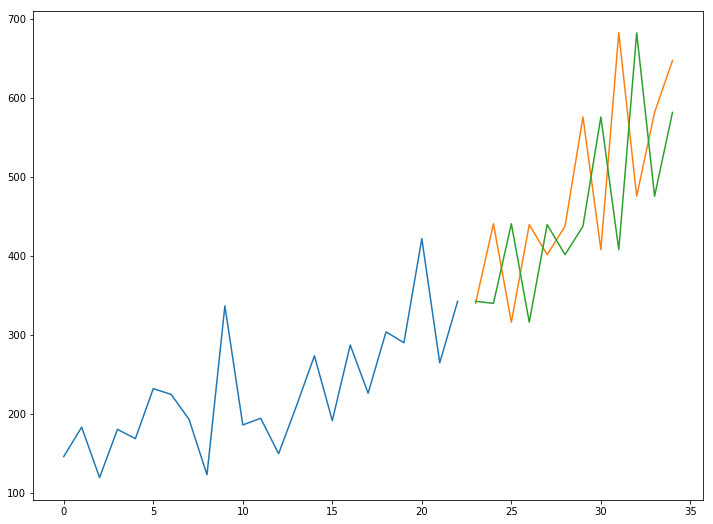

In [27]:
#Load Libraries
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas as pd
% pylab inline
pylab.rcParams['figure.figsize'] = (12,9)

#Load Data
def parser(x):
    try:  
        return datetime.strptime('190'+x, '%Y-%m')
    except:
        return pd.NaT

series = read_csv("shampoo.csv", header=0, parse_dates=[0],
                  index_col = 0, squeeze=True, date_parser=parser)

#Create Lagged Dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']

#split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_x, train_y = train[:,0], train[:,1]
test_x, test_y = test[:,0], test[:-1,1]

#persistence model
def model_persistence(x):
    return x

#walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)

#plot predictions and expected results
pyplot.plot(train_y)
pyplot.plot([None for i in train_y] + [x for x in test_y])
pyplot.plot([None for i in train_y] + [x for x in predictions])
pyplot.show()


The persistence algorithm is naive. It is often called the naive forecast. It assumes nothing about the specifics of the time series problem to which it is applied. This is what makes it so easy to understand and so quick to implement and evaluate. As a machine learning practitioner, it can also spark a large number of improvements. Write them down. This is useful because these ideas can become input features in a feature engineering effort or simple models that may be combined in an ensembling effort later.
